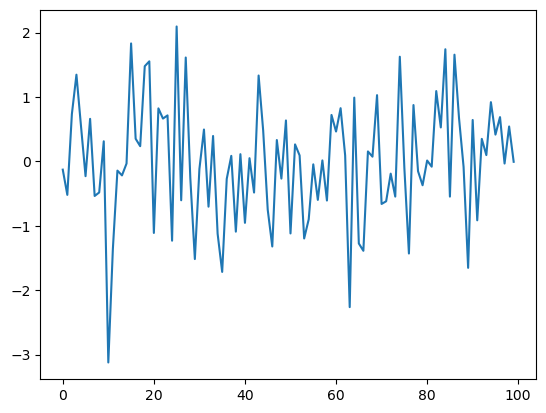

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

ϵ_values = np.random.randn(100)
plt.plot(ϵ_values)
plt.show()

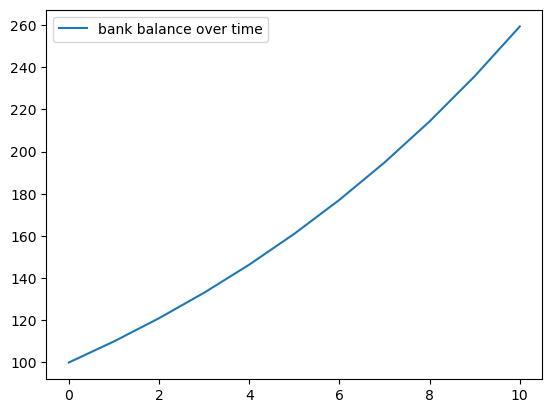

In [1]:
import numpy as np
import matplotlib.pyplot as plt

r = 0.1 # 10% interest rate
t = 10 # 10 years
b = np.empty(t+1) # creates an array of length t+1
b[0] = 100 # starting balance b at time 0

for i in range(t):
    b[i+1] = (1+r) * b[i]

plt.plot(b, label = "bank balance over time") 
plt.legend()
plt.show()

# Exercise 3.1
Your first task is to simulate and plot the correlated time series
$x_{t+1}=\alpha x_{t}+\varepsilon_{t+1}$, where $x_{0}=0$ and $t=0,\dots,T$

The sequence of shocks ${\varepsilon_{t}}$ is assumed to be IID and standard normal.
Set $T=200,\alpha=0.9$


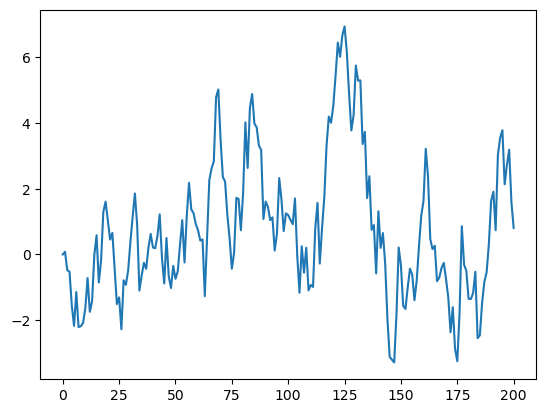

In [9]:
T = 200 # total time period
x = np.empty(T+1) # array of length T+1. we need this so that we have 0-200 elements, so that x[i+1] doesn't go out of bounds
x[0] = 0
α = 0.9 # some coefficient
ε = np.random.randn(T+1) # shocks in each period

for i in range(T):
    x[i+1] = α*x[i] + ε[i+1]

plt.plot(x)
plt.show()

# Exercise 3.2
Starting with your solution to exercise 1, plot three simulated time series, one for each of the cases $\alpha=0$, $\alpha=0.8$ and $\alpha=0.98$. 

Use a `for` loop to step through the $\alpha$ values.

If you can, add a legend, to help distinguish between the three time series.

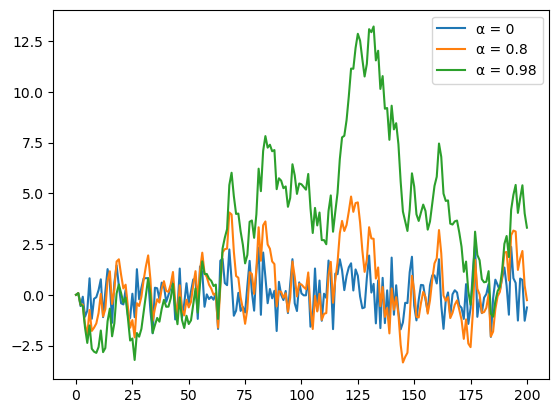

In [21]:
α_values = [0,0.8,0.98]
plotted_arrays = [None] * len(α_values) # we'll store len number of arrays in this and then plot them

counter = 0 # decides the index position for plotted_arrays
for value in α_values:
    α = value
    for i in range(T):
        x[i+1] = α*x[i] + ε[i+1]
    plotted_arrays[counter] = x.copy() # stores the array x with the corresponding alpha to the list
    counter += 1

for array in range(len(plotted_arrays)):
    plt.plot(plotted_arrays[array], label = f"{'α'} = {α_values[array]}")

plt.legend()
plt.show()


# Exercise 3.3

Similar to the previous exercises, plot the time series $x_{t+1}=\alpha |x_{t}|+\varepsilon_{t+1}$, where $x_{0}=0$ and $t=0,\dots,T$.

Use $T=200,\alpha=0.9$ and ${\varepsilon_{t}}$ as before.

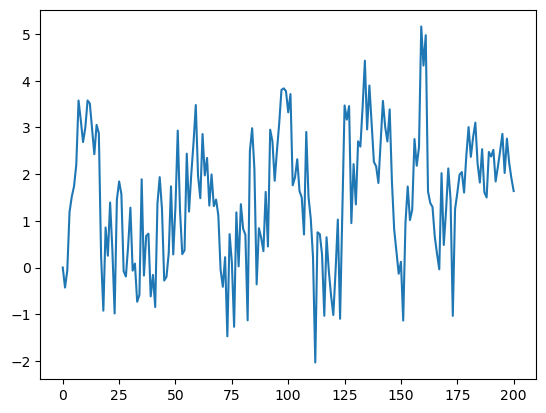

In [22]:
T = 200 # total time period
x = np.empty(T+1) # array of length T+1. we need this so that we have 0-200 elements, so that x[i+1] doesn't go out of bounds
x[0] = 0
α = 0.9 # some coefficient
ε = np.random.randn(T+1) # shocks in each period

for i in range(T):
    x[i+1] = α*abs(x[i]) + ε[i+1]

plt.plot(x)
plt.show()

# Exercise 3.4

Repeat 3.3 but create your own absolute value function

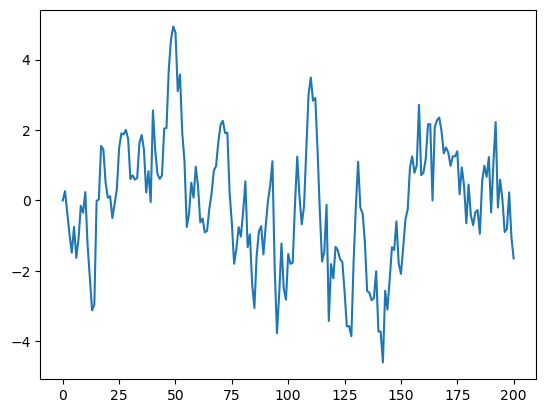

In [32]:
def absval(n):
    if n >= 0:
        return n
    elif n < 0:
        return n + (-2*n)

T = 200 # total time period
x = np.empty(T+1) # array of length T+1. we need this so that we have 0-200 elements, so that x[i+1] doesn't go out of bounds
x[0] = 0
α = 0.9 # some coefficient
ε = np.random.randn(T+1) # shocks in each period

for i in range(len(x)):
    x[i] = absval(x[i])

for i in range(T):
    x[i+1] = α*x[i] + ε[i+1]

plt.plot(x)
plt.show()


# Exercise 3.5

Compute an approximation to $\pi$ using Monte Carlo

In [ ]:
# create a unit square and inscribe a quadrant in it. the ratio of their areas is pi/4.
# randomly place dots in the square. calculate the ratio of the dots within 1 unit from the origin (in the quadrant)
# and more than 1 unit away (in square, but not in quadrant).
# multiply the ratio by 4 to get pi
# YOU CAN ONLY USE NUMPY

n = 100000 # increase n to increase accuracy of the estimation
h = np.random.rand(n)
k = np.random.rand(n)
points = [(0,0)] * n # list of all points

quadrant = 0 # points in the quadrant (d<1)
square = 0 # points in the square and not in the quadrant (d>1)

index = 0
for i,j in zip(h,k):
    points[index] = (i,j)
    index += 1

distance = [None]*n
distance = np.sqrt((h**2)+(k**2))

for d in distance:
    if d <= 1:
        quadrant += 1
    else:
        square += 1

ratio = quadrant/(quadrant+square)
π = ratio*4

print(π)

3.14036
